In [ ]:
#Python Week Two Project

In [58]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [3]:
#Load the CSV Dataset
df=pd.read_csv(r"C:\Users\Analy\Documents\Datasets\1. Weather Data.csv")

In [4]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Data Overview and Cleaning

In [ ]:
Data Overview and Cleaning:
What are the key characteristics of the dataset? (e.g., number of records, features, data types)
Identify and handle any missing or null values. Describe your approach and reasoning.
Check for and address any duplicate records.

In [5]:
#The total number of rows and columns in the dataset
df.shape

(8784, 8)

In [6]:
# First we look at the information in the dataset to know the column names, values the data types and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
# The .info() method method gives you an idea of what columns have Null values.
# Decides if a column has the correct data type or not.
# And finally lets you check the memory usage

In [7]:
# Counting all null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [ ]:
# We do not have data missing.

# Statistical Summary

In [ ]:
Statistical Summary:
Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
Identify and describe any significant outliers in the data.

In [8]:
# The describe method provides the descriptive statistics information for all the numerical columns.
df.describe(include = "all")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [ ]:
Identify and describe any significant outliers in the data.

<Axes: >

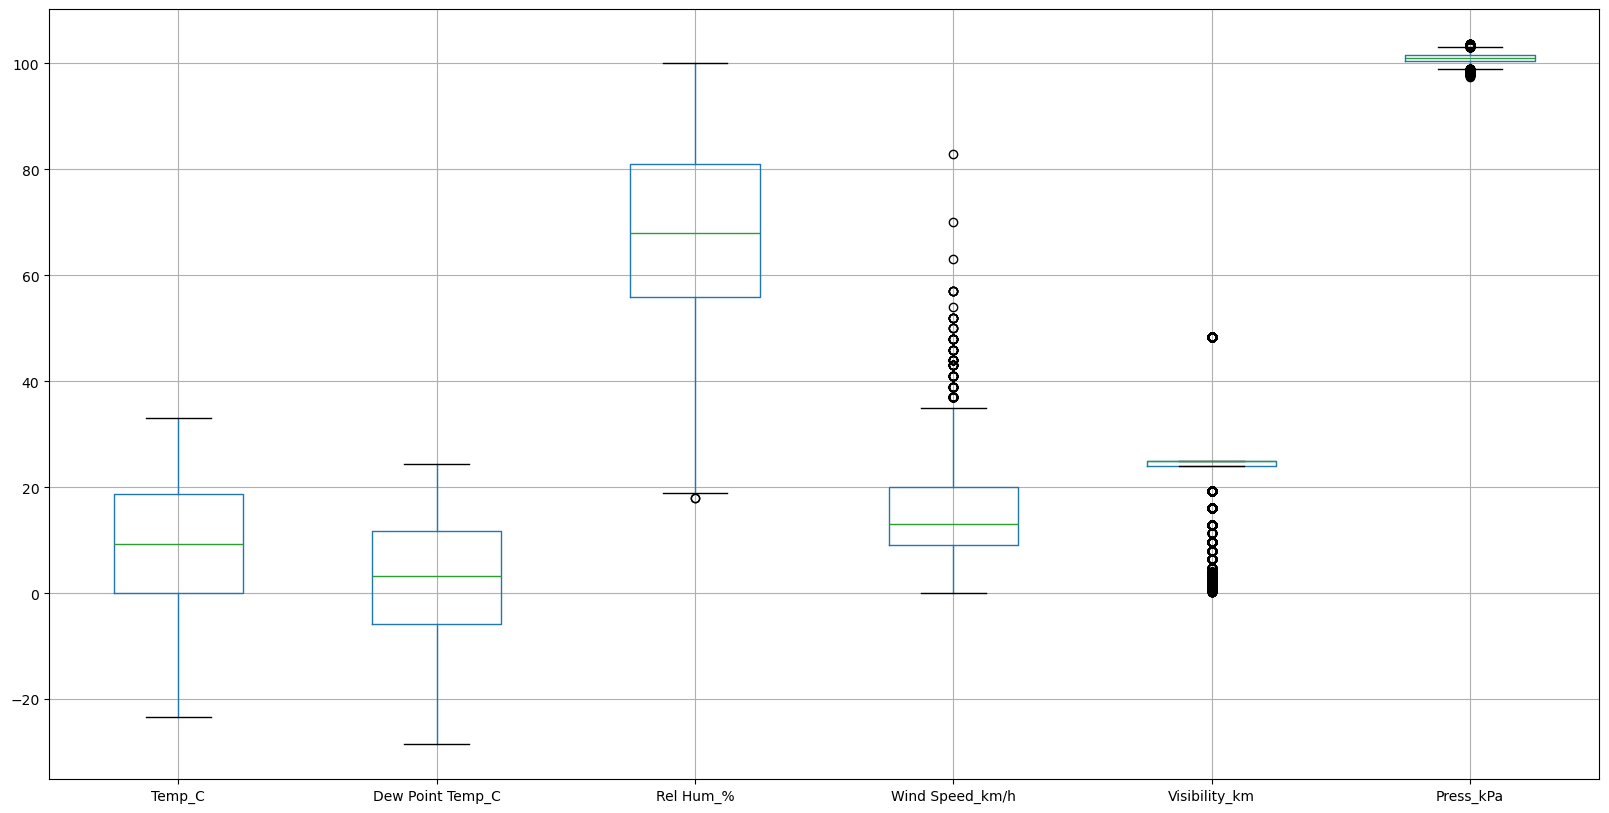

In [16]:
# First we create a boxplot to view the whole dataset
df.boxplot(figsize=(20,10))

In [ ]:
There are significant outliers in the following columns 'Wind Speed_km/h'	'Visibility_km'	'Press_kPa'	

In [ ]:
I will now provide individual Boxplots for the above stated multiple columns

[]

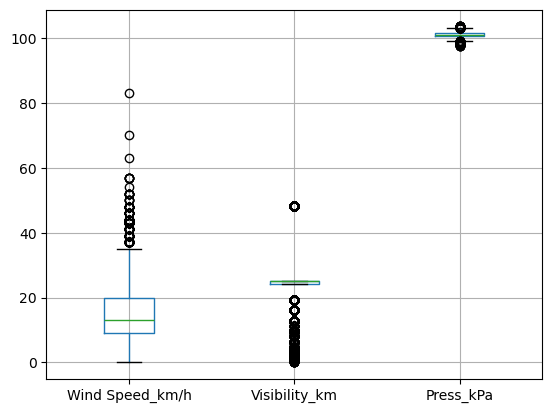

In [20]:
b_plot = df.boxplot(column = ['Wind Speed_km/h', 'Visibility_km', 'Press_kPa']) 
b_plot.plot() 

# Data Visualization

In [ ]:
Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

<Axes: title={'center': 'Weather V/s Temperature'}, xlabel='Weather', ylabel='Temp_C'>

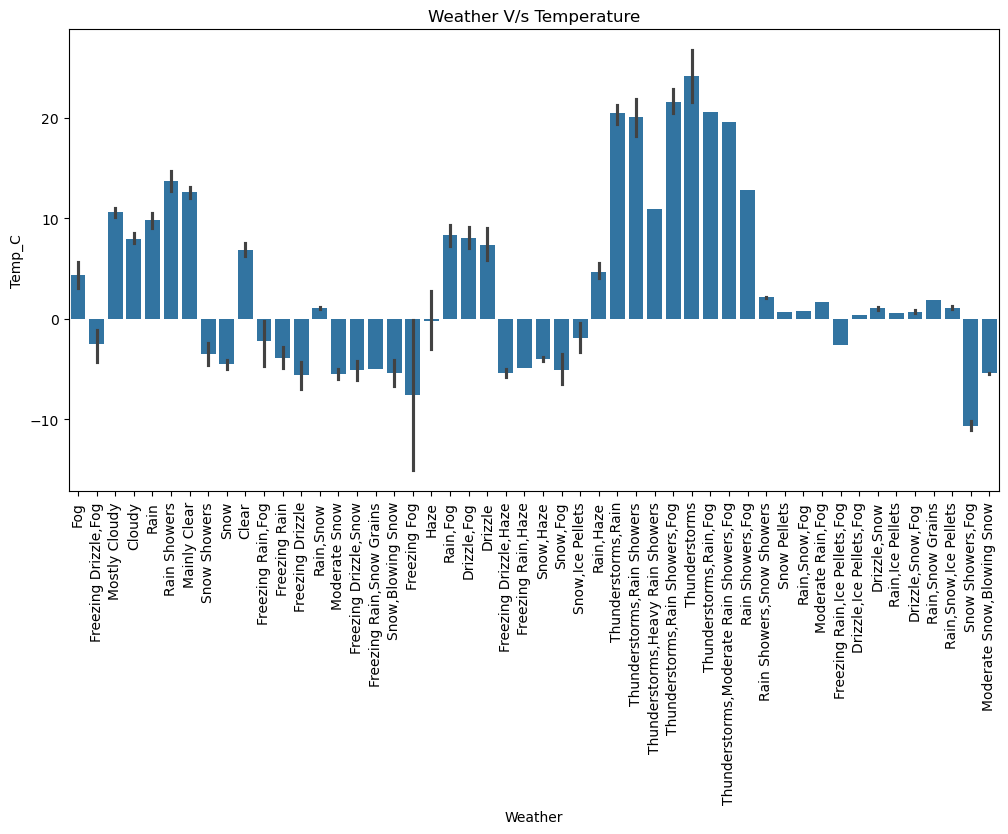

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather V/s Temperature')
sns.barplot(x=df['Weather'],y=df['Temp_C'])

<Axes: title={'center': 'Weather V/s Humidity'}, xlabel='Weather', ylabel='Rel Hum_%'>

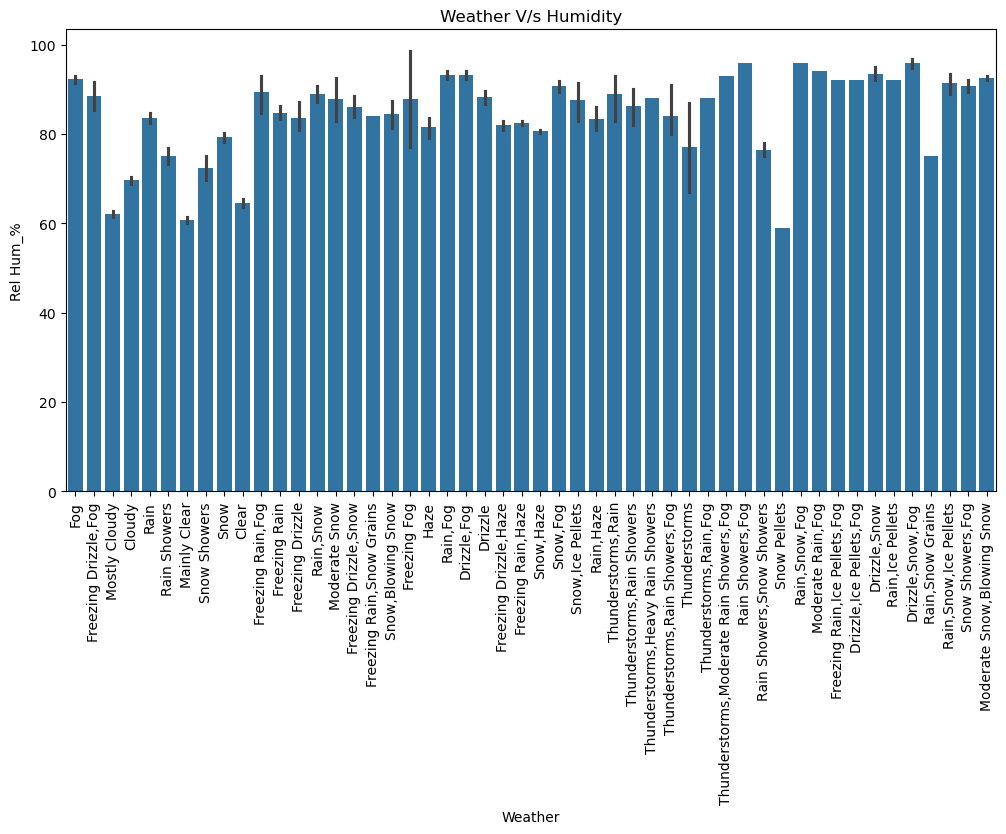

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather V/s Humidity')
sns.barplot(x=df['Weather'],y=df['Rel Hum_%'])

<Axes: title={'center': 'Weather V/s Wind Speed'}, xlabel='Weather', ylabel='Wind Speed_km/h'>

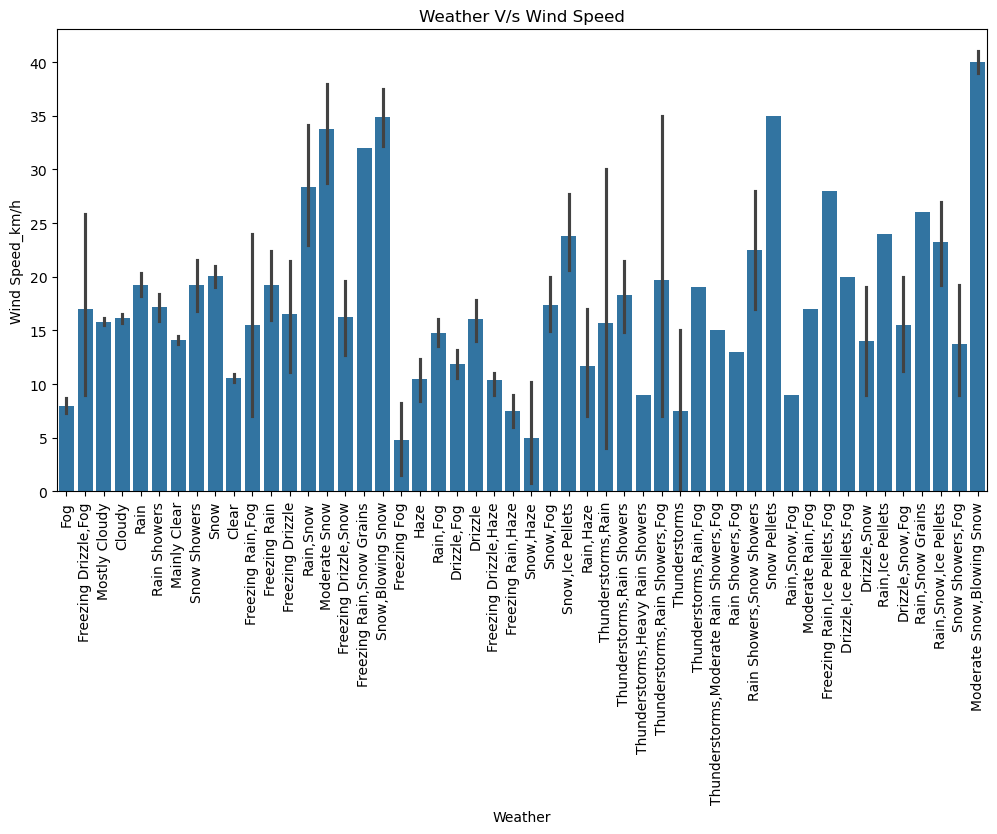

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather V/s Wind Speed')
sns.barplot(x=df['Weather'],y=df['Wind Speed_km/h'])

In [ ]:
Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

In [43]:
# I will use an inbuilt style to change the appearance of the plot
plt.style.use("fivethirtyeight")
# I will then proceed to set the figure size
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Time Series Plot on Temp_C')

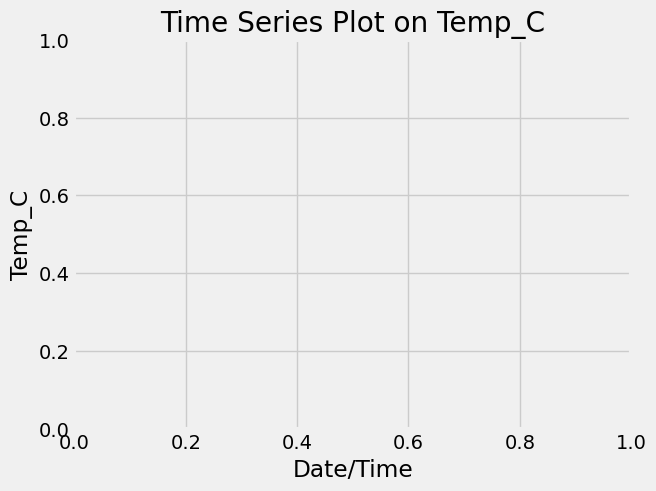

In [46]:
# I will then label the axes and set the title
plt.xlabel("Date/Time")
plt.ylabel("Temp_C")
plt.title("Time Series Plot on Temp_C")

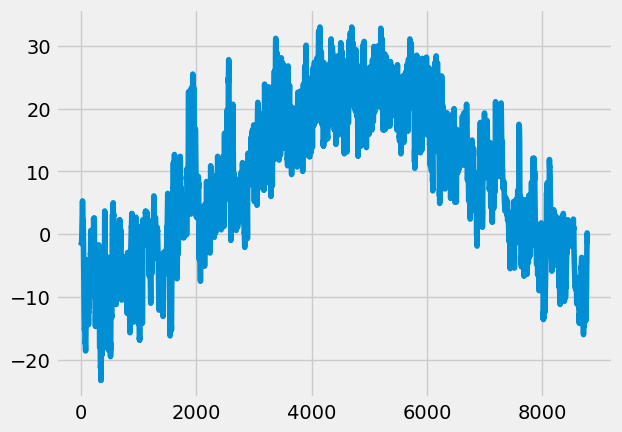

In [45]:
# I will now plot the column
plt.plot(df["Temp_C"])

In [47]:
# I will use an inbuilt style to change the appearance of the plot
plt.style.use("fivethirtyeight")
# I will then proceed to set the figure size
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Time Series Plot on Dew Point Temp_C')

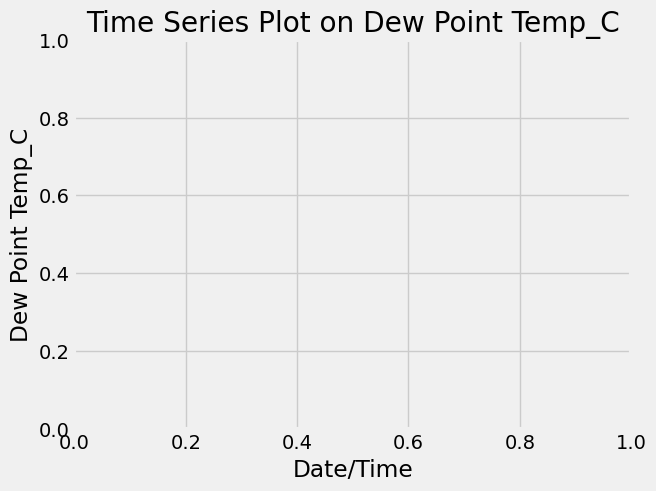

In [48]:
# I will then label the axes and set the title
plt.xlabel("Date/Time")
plt.ylabel("Dew Point Temp_C")
plt.title("Time Series Plot on Dew Point Temp_C")

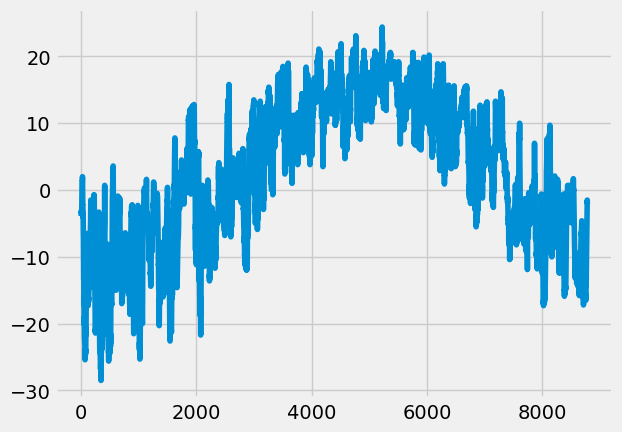

In [49]:
# I will now plot the column
plt.plot(df["Dew Point Temp_C"])

In [50]:
# I will use an inbuilt style to change the appearance of the plot
plt.style.use("fivethirtyeight")
# I will then proceed to set the figure size
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Time Series Plot on Rel Hum_%')

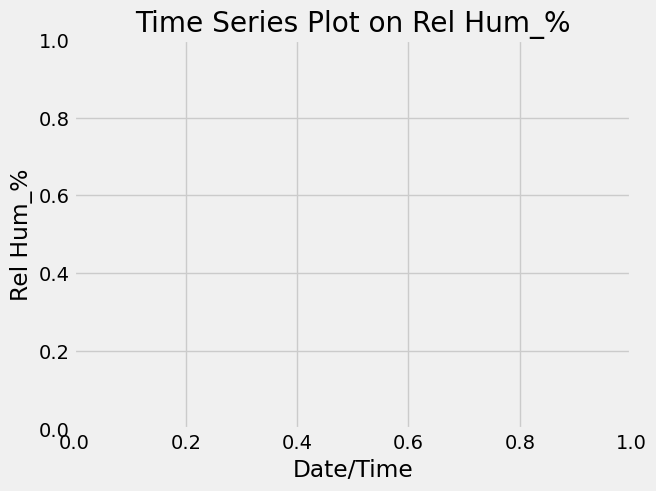

In [51]:
# I will then label the axes and set the title
plt.xlabel("Date/Time")
plt.ylabel("Rel Hum_%")
plt.title("Time Series Plot on Rel Hum_%")

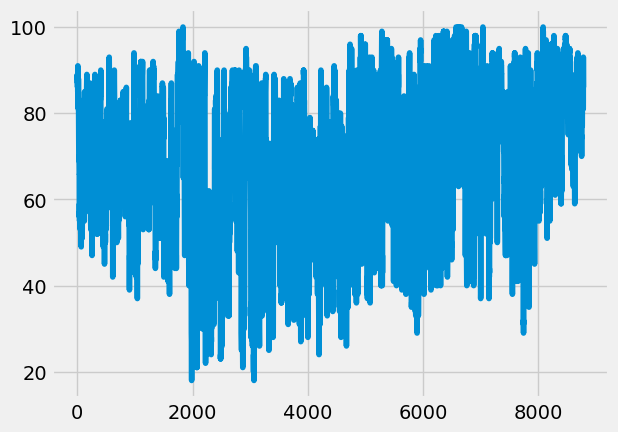

In [52]:
# I will now plot the column
plt.plot(df["Rel Hum_%"])

In [53]:
# I will use an inbuilt style to change the appearance of the plot
plt.style.use("fivethirtyeight")
# I will then proceed to set the figure size
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Time Series Plot on Wind Speed_km/h')

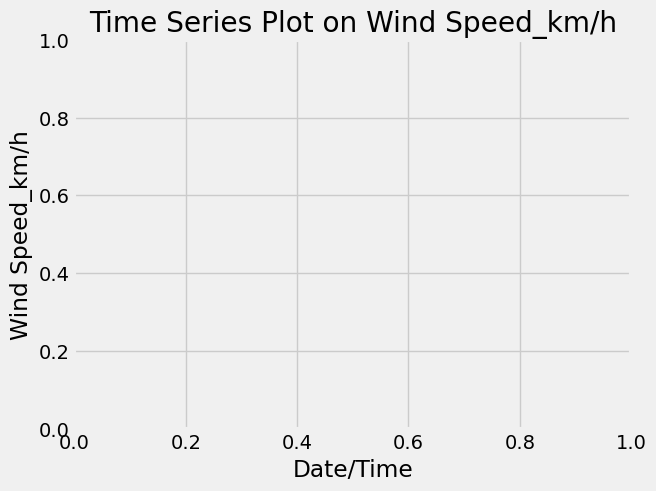

In [55]:
# I will then label the axes and set the title
plt.xlabel("Date/Time")
plt.ylabel("Wind Speed_km/h")
plt.title("Time Series Plot on Wind Speed_km/h")

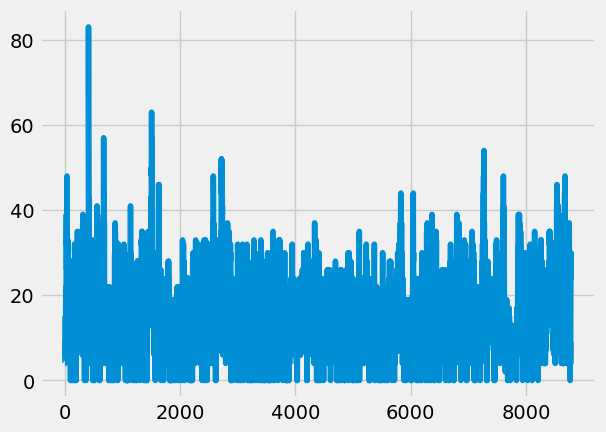

In [57]:
# I will now plot the column
plt.plot(df["Wind Speed_km/h"])

In [ ]:
Visibility_km

In [59]:
# I will use an inbuilt style to change the appearance of the plot
plt.style.use("fivethirtyeight")
# I will then proceed to set the figure size
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Time Series Plot on Visibility_km')

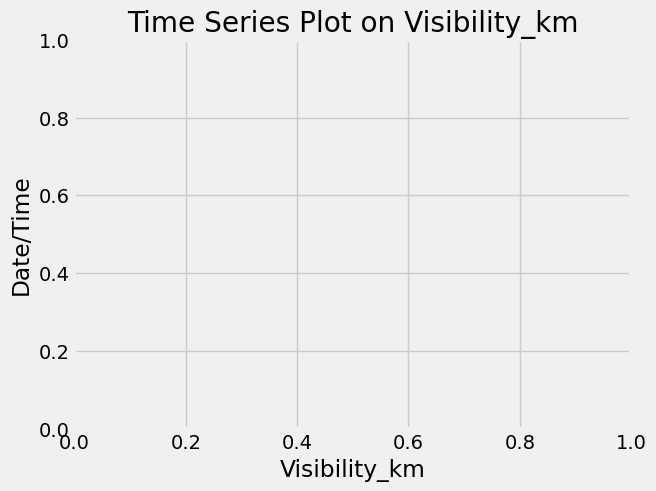

In [64]:
# I will then label the axes and set the title
plt.xlabel("Visibility_km")
plt.ylabel("Date/Time")
plt.title("Time Series Plot on Visibility_km")

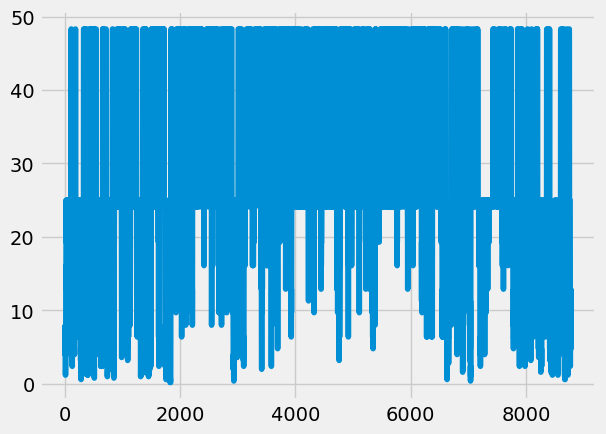

In [65]:
# I will now plot the column
plt.plot(df["Visibility_km"])

In [ ]:
Create correlation matrices and heatmaps to identify relationships between different weather parameters.

In [76]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [78]:
# Check the data types of the columns
print(df.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


In [82]:
# We add .corr that will make me a correlation table
# Then I set the parameter numeric only to true
# Then I round all numbers to two decimal places
# I change the method to spearman, this will calculate the correlations using spearmans rank instead
# Turn it into a variable by equating it to my_df1
my_df1=df.corr(numeric_only=True, method='spearman').round(2)

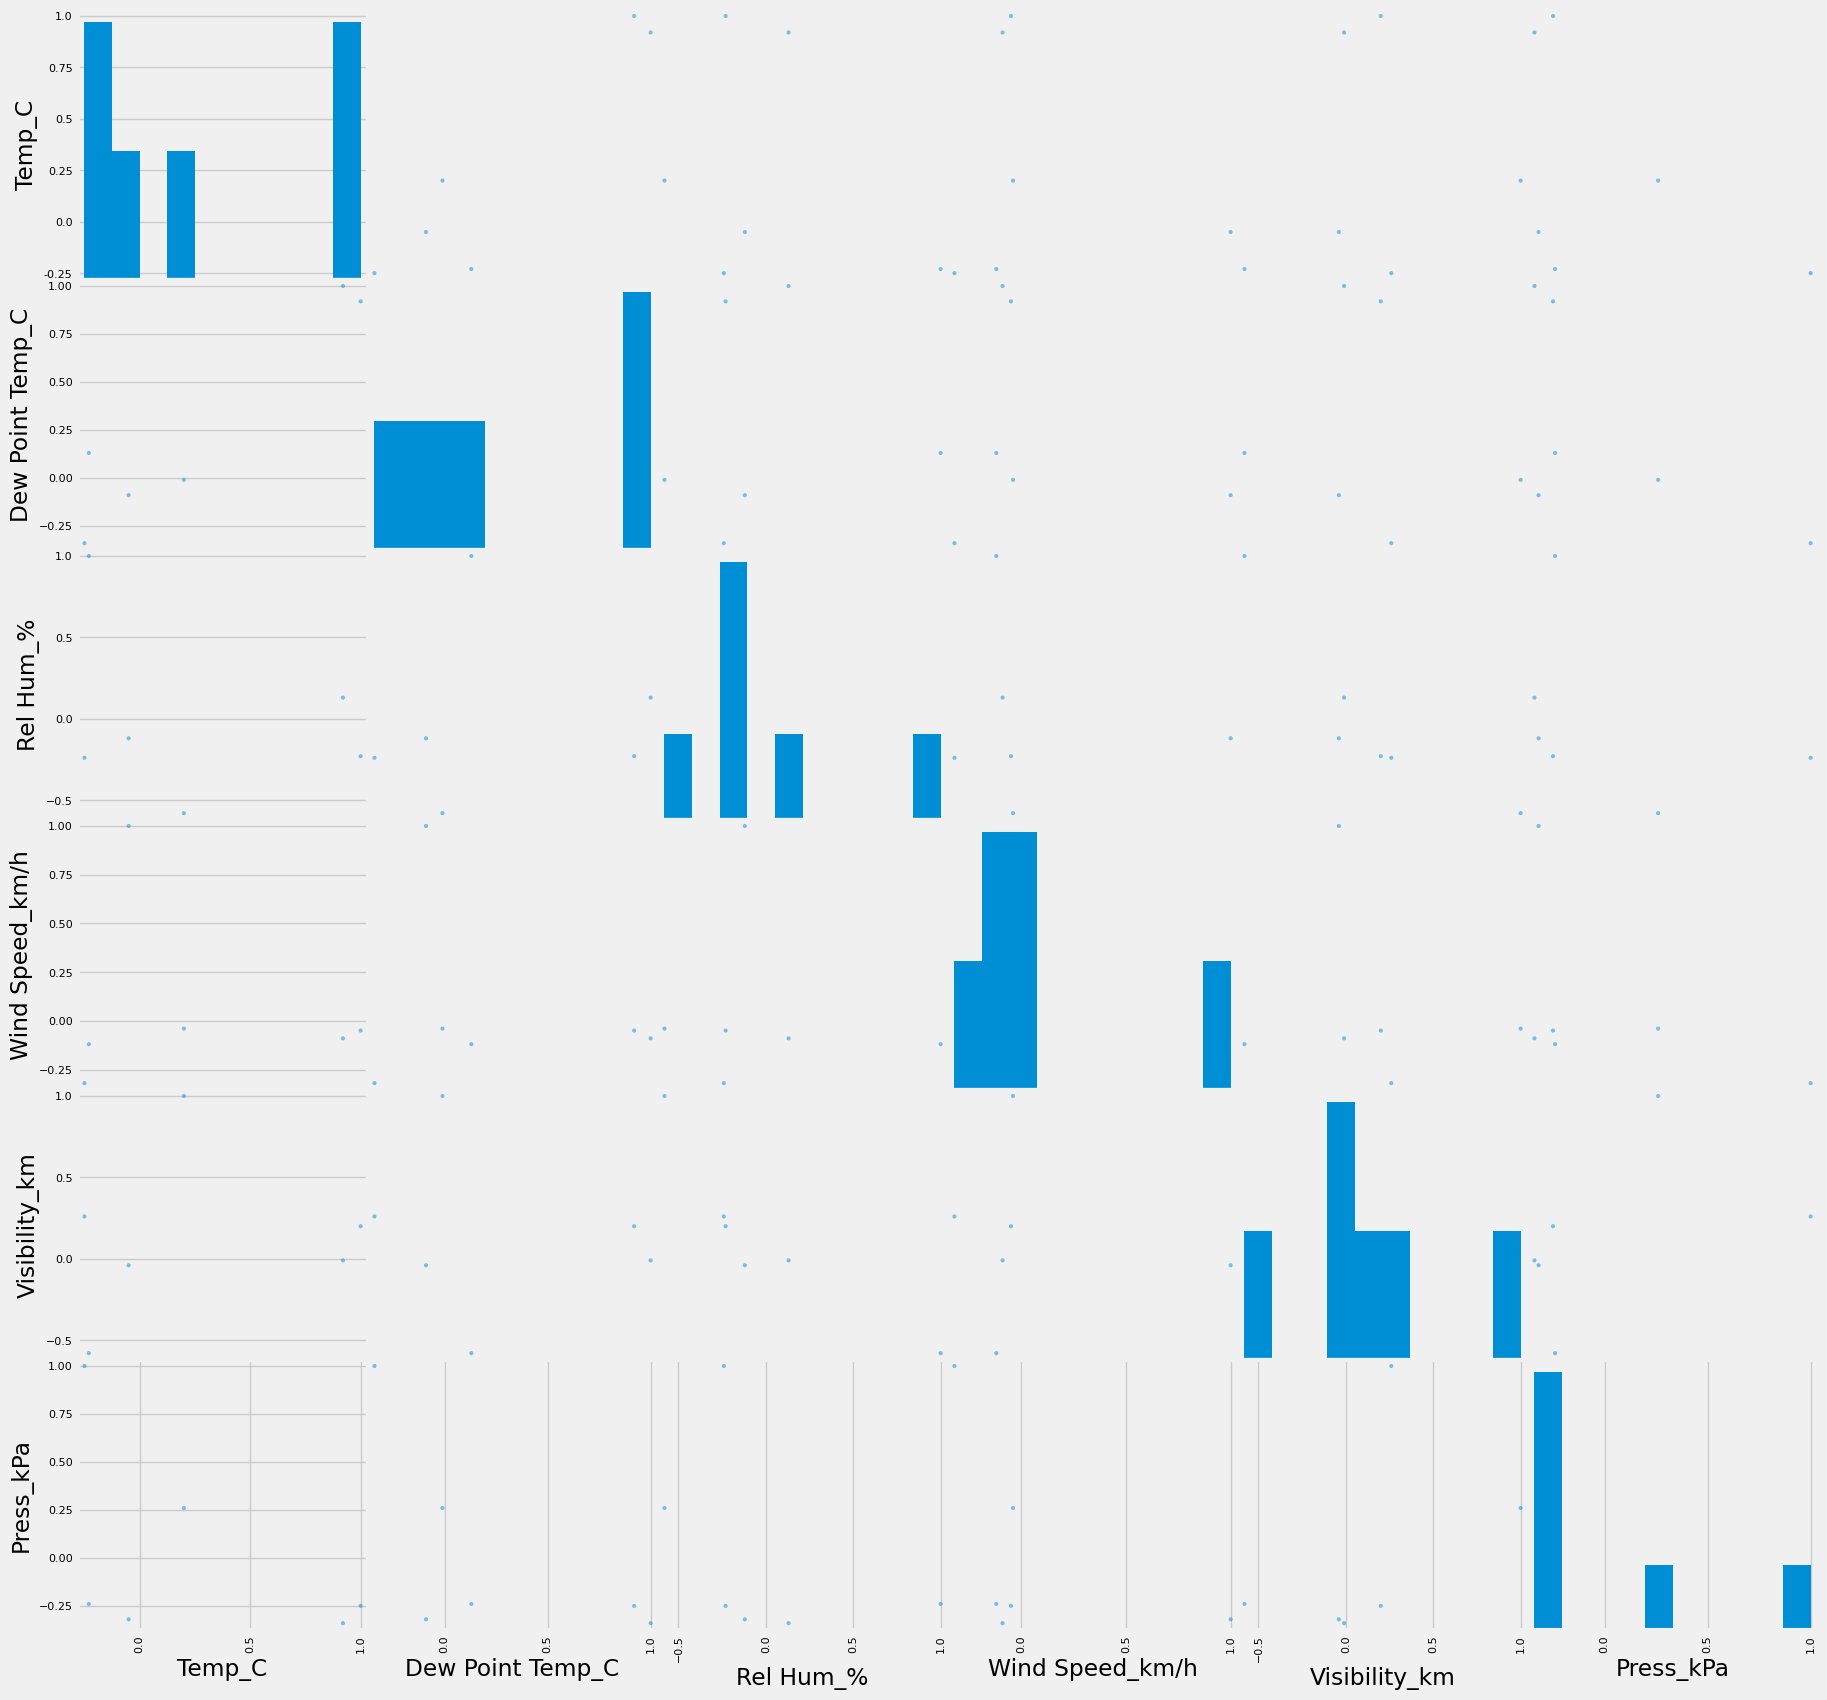

<Axes: >

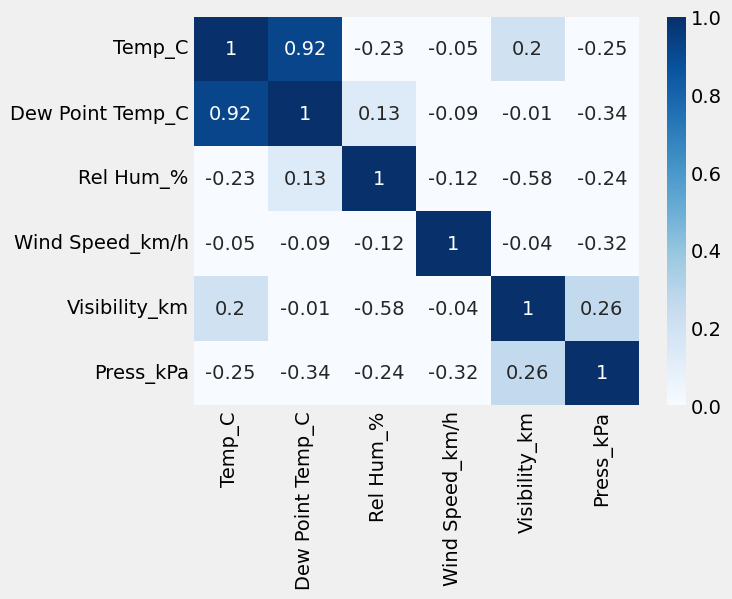

In [89]:
#I color all the cells then change the color using cmap to greens
# I create a correlation figure
# In the figure, we have down the middle all of the distributions and in each of the boxes is data from one column plotted against all of the other columns
# All the correlations are clear to see
# Then I turn the figure into a heatmap
# Change the color of the heatmap using cmap to blues with higher numbers getting a darker blue.
# Fix the scale with vmin and for the sake of completeness vmax to control where the color scale starts and ends rather than relying on seaborn to work it out.
# Add annotations using annot=True and this adds in all the correlation as the numbers.






my_df1.style.background_gradient(cmap="Greens")
pd.plotting.scatter_matrix(my_df1, figsize=(20,20))
plt.show()
sns.heatmap(my_df1,cmap="Blues", vmin=0, vmax=1, annot=True)

# Weather Patterns and Trends

In [ ]:
Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

In [101]:
df_2= df[["Date/Time", "Rel Hum_%", "Temp_C", "Weather"]]
df_2.head()


,Date/Time,Rel Hum_%,Temp_C,Weather
0,1/1/2012 0:00,86,-1.8,Fog
1,1/1/2012 1:00,87,-1.8,Fog
2,1/1/2012 2:00,89,-1.8,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,88,-1.5,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,88,-1.5,Fog


In [103]:
df[['Rel Hum_%', 'Temp_C']]

,Rel Hum_%,Temp_C
0,86,-1.8
1,87,-1.8
2,89,-1.8
3,88,-1.5
4,88,-1.5
...,...,...
8779,81,0.1
8780,83,0.2
8781,93,-0.5
8782,89,-0.2


In [127]:
df_Weather_counts = df.groupby(["Weather", "Temp_C", "Date/Time","Rel Hum_%"]).size()
df_Weather_counts

Weather                         Temp_C  Date/Time        Rel Hum_%
Clear                           -23.3   1/15/2012 8:00   62           1
                                -19.2   1/16/2012 3:00   67           1
                                -19.1   1/16/2012 5:00   69           1
                                -18.7   1/16/2012 4:00   66           1
                                        1/16/2012 6:00   68           1
                                                                     ..
Thunderstorms,Rain Showers       25.5   7/17/2012 14:00  87           1
Thunderstorms,Rain Showers,Fog   19.5   6/29/2012 3:00   81           1
                                 22.4   7/31/2012 20:00  80           1
                                 22.9   7/17/2012 9:00   91           1
Thunderstorms,Rain,Fog           20.6   7/17/2012 5:00   88           1
Length: 8784, dtype: int64

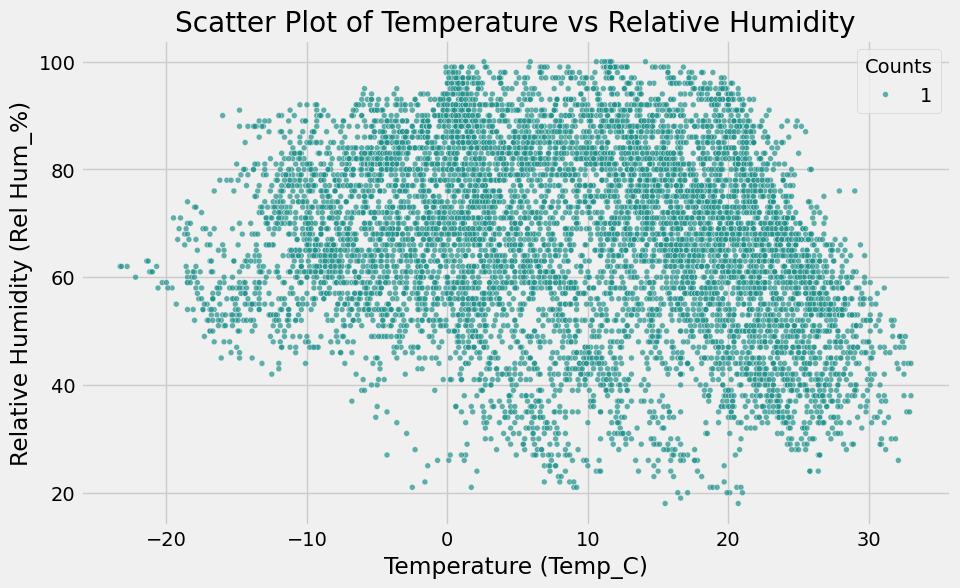

In [132]:
# Convert 'Date/Time' to datetime if necessary
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by multiple columns and count occurrences
df_Weather_counts = df.groupby(["Weather", "Temp_C", "Date/Time", "Rel Hum_%"]).size()

# Reset index to convert Series with MultiIndex to DataFrame
df_Weather_counts = df_Weather_counts.reset_index(name='Counts')

# Alternatively, plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Weather_counts, x='Temp_C', y='Rel Hum_%', size='Counts', hue='Counts', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Temperature vs Relative Humidity')
plt.xlabel('Temperature (Temp_C)')
plt.ylabel('Relative Humidity (Rel Hum_%)')
plt.legend(title='Counts')
plt.show()


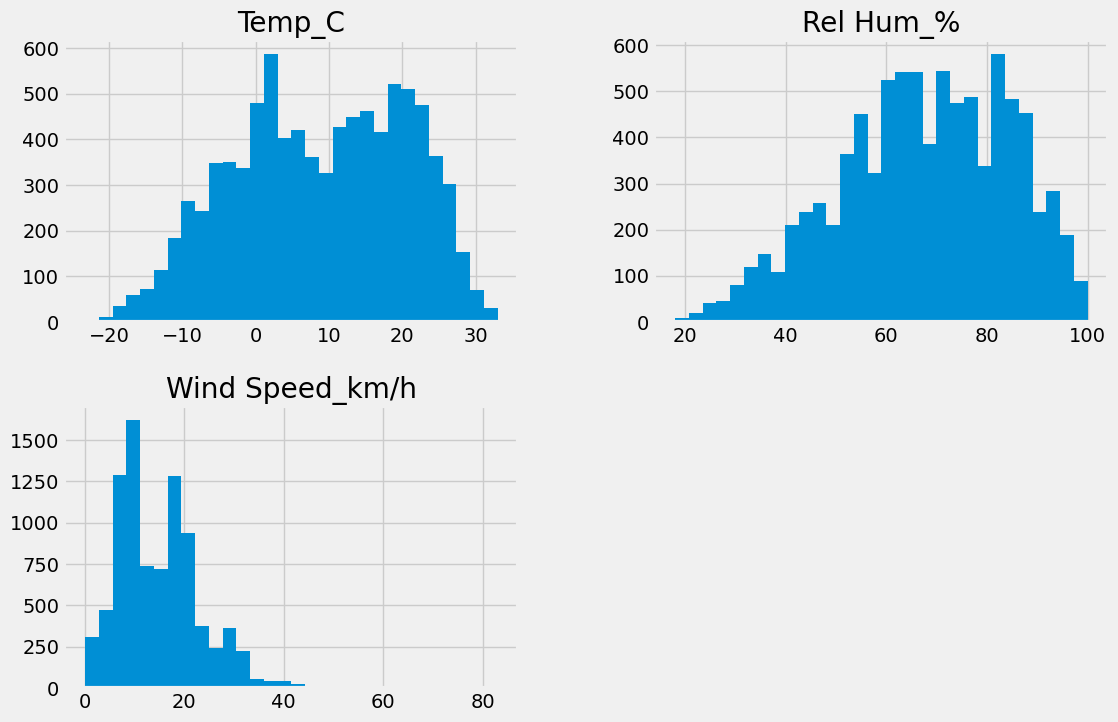

In [137]:
#Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
# I will Plot histograms for the below stated columns to identify unusual distributions.
df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].hist(bins=30, figsize=(12, 8))
plt.show()

In [ ]:
# There are anomalies and unusual patterns in the data and this is owing to the presence of outliers

# Insights and Conclusions

In [ ]:
# Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
1. There are anomalies and unusual patterns in the data and this is owing to the presence of outliers
2. As time passes by and climate changes, it is impacting extreme weather with regards to temperature,humidity and other weather patterns.
3. The data can be used for weather prediction as well as better mitigation techniques to avert harsh weather conditions

# Recommendations for Further Analysis

In [ ]:
We should examine recent changes in temperature, humidity, wind speed, and other weather variables to better predict future weather conditions/